# Lab4 Spatial Data Model
----------------------------------

# HOMEWORK ASSIGNMENT

**Answer the following questions in the jupyter notebook file. (You can also use other IDEs to test your code) **

## 1. Finish the tutorial (30 points)

Read the __tutorial "The Shapely User Manual"__ at https://shapely.readthedocs.io/en/latest/manual.html#the-shapely-user-manual.
You will review the concepts learnt in the lecture and learn more about shapely documents.

Practice some of the examples in your python IDE.

Investigate and implement 4 different operations from spatial-analysis-methods https://shapely.readthedocs.io/en/latest/manual.html#spatial-analysis-methods and other operations https://shapely.readthedocs.io/en/latest/manual.html#other-operations. 

e.g.

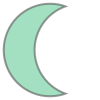

In [1]:
from shapely.geometry import Point, LineString, Polygon
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.difference(b)

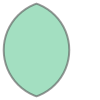

In [1]:
from shapely.geometry import Point, LineString, Polygon

#1
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.intersection(b)

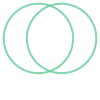

In [6]:
from shapely.geometry import Point, LineString, Polygon

#2  I commented the bottom three statements individually
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.union(b)
a.union(b).boundary
a.boundary.union(b.boundary)

In [13]:
from shapely.geometry import Point, LineString, Polygon
from shapely.ops import polygonize
#3

lines = [
        ((0, 0), (1, 1)),
        ((0, 0), (0, 1)),
        ((0, 1), (1, 1)),
        ((1, 1), (1, 0)),
        ((1, 0), (0, 0))
        ]
print(list(polygonize(lines)))

lines

[<shapely.geometry.polygon.Polygon object at 0x04A89A50>, <shapely.geometry.polygon.Polygon object at 0x04A89B30>]


[((0, 0), (1, 1)),
 ((0, 0), (0, 1)),
 ((0, 1), (1, 1)),
 ((1, 1), (1, 0)),
 ((1, 0), (0, 0))]

In [17]:
from shapely.geometry import Point, LineString, Polygon
from shapely.ops import triangulate
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon,box
#4

points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
triangles = triangulate(points)
print([triangle.wkt for triangle in triangles])

['POLYGON ((0 2, 0 0, 1 1, 0 2))', 'POLYGON ((0 2, 1 1, 2 2, 0 2))', 'POLYGON ((2 2, 1 1, 3 1, 2 2))', 'POLYGON ((3 1, 1 1, 1 0, 3 1))', 'POLYGON ((1 0, 1 1, 0 0, 1 0))']


## 2. Creating basic geometries (20 points)

Design functions for creating geometries.

Create a function called createPointList() that has two parameters (x_coord_list, y_coord_list). Function should create a list shapely Point geometry object and return that list. 

Demonstrate the usage of the function by creating a list of Point -objects with the function using input [1,2,3,4], [5,6,7,8].

In [278]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, MultiPoint
import pandas as matplotlib
import pandas as pd
import matplotlib.pyplot as plt

x_coord_list = [1,2,3,4]
y_coord_list = [5,6,7,8]
# define a function that takes two list of numbers to create point list
def createPointList(x_coord_list, y_coord_list):
    # create a list shapely Point geometry object
    x_l = x_coord_list
    y_l = y_coord_list
    
    point1 = Point(x_l[0], y_l[0])
    point2 = Point(x_l[1], y_l[1])
    point3 = Point(x_l[2], y_l[2])
    point4 = Point(x_l[3], y_l[3])
#    listp = MultiPoint(point1, point2, point3, point4)
    print point1, point2, point3, point4
    # return that list
    return(point1, point2, point3, point4)
    
    
    
    
#    p_l = [Point(x,y) for x in x_l]
    # return that list
#    return(x_l,y_l)
#x_l = [1,2,3,4]
#p_l = [Point(x,y) for x in range(x_l)]
#p_list = [point1, point2, point3, point4]
#xlist = [point1.x, point2.x, point3.x, point4.x] 
#xlist
#print(point1)
#print(point2)
#print(point3)
#print(point4)
#print('x coordinates are %', xlist)
#print('y coordinates are %', ylist)
#x = [1, 2, 3]
#y = [4, 5, 6]

#for i, j in zip(x, y):
#   print i + " / " + j

In [279]:
#call the function to test 
#pointList = createPointList([1,2,3,4], [5,6,7,8])
createPointList([1,2,3,4], [5,6,7,8])
#for p in pointList:
#    print p

POINT (1 5) POINT (2 6) POINT (3 7) POINT (4 8)


(<shapely.geometry.point.Point at 0xa0e1510>,
 <shapely.geometry.point.Point at 0xa0e1ff0>)

## 3. Reading coordinates from a file and creating a geometries (30 points)

One of the "classical" problems in GIS is the situation where you have a set of coordinates in a file and you need to get them into a map (or into a GIS-software). Python is a really handy tool to solve this problem as with Python it is basically possible to read data from any kind of input datafile (such as csv-, txt-, excel-, or gpx-files (gps data) or from different databases). So far, I haven't faced any kind of data or file that would be impossible to read with Python.

Thus, let's see how we can read data from a file and create Point -objects from them that can be saved e.g. as a new Shapefile (we will learn this next week). Our dataset travelTimes_2015_Helsinki.txt consist of travel times between specific locations in Helsinki Region. The first four rows of our data looks like this:

>from_id;to_id;fromid_toid;route_number;at;from_x;from_y;to_x;to_y;total_route_time;route_time;route_distance;route_total_lines
   5861326;5785640;5861326_5785640;1;08:10;24.9704379;60.3119173;24.8560344;60.399940599999994;125.0;99.0;22917.6;2.0
   5861326;5785641;5861326_5785641;1;08:10;24.9704379;60.3119173;24.8605682;60.4000135;123.0;102.0;23123.5;2.0
   5861326;5785642;5861326_5785642;1;08:10;24.9704379;60.3119173;24.865102;60.4000863;125.0;103.0;23241.3;2.0

Thus, we have many columns of data, but the few important ones are:

|Column	|Description  |
|-------|-------------|
|from_x	|x-coordinate of the origin location (longitude)|
|from_y	|y-coordinate of the origin location (latitude) |
|to_x	|x-coordinate of the destination location (longitude)|
|to_y	|y-coordinate of the destination location (latitude)|
|total_route_time	|Travel time with public transportation at the route|




In [2]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString
# import pandas
import pandas as pd

In [3]:
# read the file travelTimes_2015_Helsinki.txt using pd.read_csv(), 
# the seperator parameter use sep = ';', hint, check the syntax of pd.read_csv()
df = pd.read_csv(r"C:\Users\casca\Downloads\Job & Edu\Spring 2019\AdvProgGIS\Lab4\travelTimes_2015_Helsinki.txt", sep=';')
# Only keep the 4 columns('from_x', 'from_y', 'to_x', 'to_y') in a new dataframe
df4 = df.loc[:,['from_x','from_y','to_x','to_y']]
print df4

          from_x     from_y       to_x       to_y
0      24.970438  60.311917  24.856034  60.399941
1      24.970438  60.311917  24.860568  60.400014
2      24.970438  60.311917  24.865102  60.400086
3      24.970438  60.311917  24.869636  60.400159
4      24.970438  60.311917  24.842582  60.397478
5      24.970438  60.311917  24.847115  60.397551
6      24.970438  60.311917  24.851648  60.397624
7      24.970438  60.311917  24.856182  60.397697
8      24.970438  60.311917  24.860715  60.397770
9      24.970438  60.311917  24.865249  60.397843
10     24.970438  60.311917  24.869782  60.397916
11     24.970438  60.311917  24.829131  60.395014
12     24.970438  60.311917  24.833664  60.395087
13     24.970438  60.311917  24.838197  60.395161
14     24.970438  60.311917  24.842730  60.395235
15     24.970438  60.311917  24.847263  60.395308
16     24.970438  60.311917  24.851796  60.395381
17     24.970438  60.311917  24.856330  60.395454
18     24.970438  60.311917  24.860863  60.395527


In [4]:
# Create two empty lists called orig_points and dest_points
orig_points =list()
dest_points =list()

In [7]:
#orig_points = Point(df4.loc[0,['from_x','from_y']])

# Iterate over the rows of your DataFrame using 
# "for index, row in DataFrame.iterrows():"
for index, row in df4.iterrows():
#    orig_points = Point(df4.loc[index, ['from_x','from_y']])
#    dest_points = Point(df4.loc[index, ['to_x','to_y']])
    orig_points.append(Point(row[0], row[1]))
    dest_points.append(Point(row[2], row[3]))
df4
#    print orig_points, dest_points
    # create two Shapely Point -objects based on the row data, add 
    # the two points into the orig_points -list and dest_point -list 
    # representing the origin locations and destination locations accordingly.

# I am able to get the last row return when I print orig_points and dest_points
#list(orig_points)
# Does it matter that the POINTs don't have indexes in the rows or columns?

,from_x,from_y,to_x,to_y
0,24.970438,60.311917,24.856034,60.399941
1,24.970438,60.311917,24.860568,60.400014
2,24.970438,60.311917,24.865102,60.400086
3,24.970438,60.311917,24.869636,60.400159
4,24.970438,60.311917,24.842582,60.397478
5,24.970438,60.311917,24.847115,60.397551
6,24.970438,60.311917,24.851648,60.397624
7,24.970438,60.311917,24.856182,60.397697
8,24.970438,60.311917,24.860715,60.397770
9,24.970438,60.311917,24.865249,60.397843


## 4. Creating LineStrings that represent the movements (20 points) 

Continue the code from question 3. Creating LineStrings that represent the movements

In [9]:
from shapely.geometry import Point, LineString, MultiLineString

# Create an empty list called lines
lines = list()

#or [] as an alternative to list() ?
#invoke MultiLineString?

In [23]:
# Iterate over the origin and destination lists using "for i in ???:"
for i in range(0,len(orig_points)):
    # create a Shapely LineString -object between the origin and destination point
    trip = LineString([orig_points[i], dest_points[i]])
    lines.append(trip)
                        
    # Add that line into the lines -list
    # What am I missing?
    
#len(lines)
# Should I use the i value in iterating through orig_points and dest_points?  I get the error "...can not be iterable"

In [24]:
# Find out what is the average (Euclidian) distance of all the origin-destination
# LineStrings that we just created, and print it out.
linesum = 0
for i in lines:
    linesum = linesum + lines[i].length

#linesum.mean
#or lines.mean

TypeError: list indices must be integers, not LineString

In [ ]:
Q2: 

def createPointList(x_coord_list, y_coord_list):

    # create a list shapely Point geometry object

    pList = []

    for i in range(len(x_coord_list)):

        pList.append(Point(x_coord_list[i],y_coord_list[i]))

    # return that list

    return pList﻿

(-10)



Q4: Average distance is 0.215022248232 (-5)  

sumDist = 0

for l in lines:

    sumDist += l.length

avgDist = sumDist/len(lines)


print avgDist

(-5)

Late submission (-10) Please submit on time next time.